# <center>`Bike Sharing Demand Regression Analysis`</center>
-------------------------------------------
## <center>Data-thon: DSS+ 1기 이수정</center>

# <center>프로세스</center>
## <center>0. 패키지 설치</center>
## <center>1. 모델의 성능</center>
## <center>2. 데이터 설명</center>
## <center>3. 데이터 EDA 및 전처리</center>
## <center>4. OLS 모델링</center>
## <center>5. 결론 및 한계</center>

# 0. 패키지 설치

In [43]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# 1. 결과도출

## 최종 모델의 결정계수 값은 0.896, 캐글 채점 방식이었던 rmsle는 교차검증을 통해 0.468이라는 것을 확인할 수 있다.

In [ ]:
# 저장된 결론을 먼저 보여주려고 먼저 뺐습니다. 코드를 여기부터 돌아가면 안돌아갑니다. 아래의 전처리 부분을 돌려줘야만 코드가 실행됩니다.

In [41]:
f = 'np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity) + C(season) + C(weather) + scale(windspeed) + scale(temp)' # 시간과 주말인지 아닌지의 여부가 이 모델의 거의 모든 것을 결정한다.
train_result = sm.OLS.from_formula(f, train).fit()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log((count) + 2)   R-squared:                       0.896
Model:                             OLS   Adj. R-squared:                  0.896
Method:                  Least Squares   F-statistic:                     1673.
Date:                 Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                         12:15:57   Log-Likelihood:                -6521.2
No. Observations:                10886   AIC:                         1.316e+04
Df Residuals:                    10829   BIC:                         1.357e+04
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(hour)[0]                        3.6016      0.026    138.294      0.000       3.551       3.653
C(hour)[1]                        2.8828      0.026    110.409      0.000       2.832       2.934
C(hour)[2]                        2.3678      0.026     90.097      0.000       2.316       2.419
C(hour)[3]                        2.0083      0.027     74.488      0.000       1.955       2.061
C(hour)[4]                        2.0862      0.027     78.086      0.000       2.034       2.139
C(hour)[5]                        3.3094      0.026    125.897      0.000       3.258       3.361
C(hour)[6]                        4.6970      0.026    178.621      0.000       4.645       4.749
C(hour)[7]                        5.6944      0.026    216.719      0.000       5.643       5.746
C(hour)[8]                        6.2079      0.026    236.816      0.000       6.156       6.259
C(hour)[9]                        5.5255      0.026    210.766      0.000       5.474       5.577
C(hour)[10]                       4.8900      0.026    186.428      0.000       4.839       4.941
C(hour)[11]                       4.9666      0.026    188.421      0.000       4.915       5.018
C(hour)[12]                       5.1617      0.027    194.727      0.000       5.110       5.214
C(hour)[13]                       5.1108      0.027    191.492      0.000       5.058       5.163
C(hour)[14]                       4.9970      0.027    186.735      0.000       4.945       5.049
C(hour)[15]                       5.0751      0.027    189.672      0.000       5.023       5.128
C(hour)[16]                       5.4563      0.027    204.892      0.000       5.404       5.508
C(hour)[17]                       6.0765      0.026    229.308      0.000       6.025       6.128
C(hour)[18]                       6.0337      0.026    228.403      0.000       5.982       6.085
C(hour)[19]                       5.7099      0.026    218.593      0.000       5.659       5.761
C(hour)[20]                       5.3953      0.026    207.521      0.000       5.344       5.446
C(hour)[21]                       5.1274      0.026    197.488      0.000       5.076       5.178
C(hour)[22]                       4.8664      0.026    187.649      0.000       4.816       4.917
C(hour)[23]                       4.4311      0.026    170.580      0.000       4.380       4.482
C(weekend)[T.1]                   0.9682      0.046     21.216      0.000       0.879       1.058
C(season)[T.2]                   -0.0980      0.015     -6.430      0.000      -0.128      -0.068
C(season)[T.3]                    0.2517      0.013     18.769      0.000       0.225       0.278
C(season)[T.4]                   -0.0821      0.015     -5.635      0.000      -0.111      -0.054
C(weather)[T.2]                  -

In [42]:
from sklearn.model_selection import KFold
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
rmsle(train_result.predict(train), train["count"])


scores = np.zeros(5)
errors = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train)):
    df_train1 = train.iloc[idx_train]
    df_test1 = train.iloc[idx_test]

    
    try:
        model = sm.OLS.from_formula('np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity)*C(season) + C(weather) + scale(atemp)', data=df_train1)
        result = model.fit()
    
    
        pred = np.exp(result.predict(df_test1))
        pred1 = np.exp(result.predict(df_train1))
        rss = ((df_test1['count'] - pred) ** 2).sum()
        tss = ((df_test1['count'] - df_test1["count"].mean())** 2).sum()
        rsquared = 1 - (rss / tss)
    



        scores[i] = rsquared
        errors[i] = rmsle(pred1, df_train1["count"])
    except:
        continue
    
    print("K-Fold : {}번째".format(i+1))
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared)) # 소수점 8자리까지 나와라는 코드인듯
    print("rmsle = {:.8f}".format(rmsle(pred1, df_train1["count"])))
    print()

K-Fold : 1번째
train R2 = 0.89766205, test R2 = 0.74834639
rmsle = 0.46681139

K-Fold : 2번째
train R2 = 0.89789936, test R2 = 0.77386411
rmsle = 0.47025638

K-Fold : 4번째
train R2 = 0.89831431, test R2 = 0.76719569
rmsle = 0.46858184

K-Fold : 5번째
train R2 = 0.89585304, test R2 = 0.78267505
rmsle = 0.46863563



# OLS 결론.

## 1. whether가 4인 경우만 제외하면 p-value가 모두 0이다.
## 2. 출근시간인 8시 전후나 6시 전후에 자전거 대여횟수가 높아진다.
## 3. 맑은날(whether1)에 비해 안개가 살짝 끼거나 구름낀날 등 (whether2, 3, 4)에 count가 낮아진다.
## 4. 습도나 풍속은 높을수록 count가 낮아지고, 온도는 올라갈수록 count가 올라간다.

# 2. 데이터 설명

## 워싱턴 D.C의 bikecapital 회사의 시간별 자전거 대여 데이터. [kaggle: bike sharing](https://www.kaggle.com/c/bike-sharing-demand/)


## 1일을 24시간으로 쪼개 계절, 휴일여부, 날씨, 온도, 체감온도, 습도, 풍속과 1시간당 total bike 대여 count가 있다.

## train 데이터에는 1일부터 19일까지의 데이터가 있으며, test 데이터에는 20일부터 31일까지의 데이터를 예측하는 것이 문제이다.

## 또한 이 데이터는 등록 회원과 미등록 회원의 대여 자전거 대수의 합이 예측할 Target값이라는 특성을 갖고 있다.

## train 데이터의 갯수는 10886개, test 데이터의 갯수는 6493개.

In [44]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [45]:
train.loc[0]

datetime      2011-01-01 00:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                         9.84
atemp                      14.395
humidity                       81
windspeed                       0
casual                          3
registered                     13
count                          16
Name: 0, dtype: object

In [46]:
print("train 데이터의 개수: {}".format(len(train)))
print("test 데이터의 개수: {}".format(len(test)))

train 데이터의 개수: 10886
test 데이터의 개수: 6493


> **Feature Data(9)**  
* `datetime` - hourly date + timestamp (2012-12-19 19:00:00)
* `season`   
  * 1 = spring   
  * 2 = summer  
  * 3 = fall  
  * 4 = winter    
* `holiday` - whether the day is considered a holiday  
* `workingday` - whether the day is neither a weekend nor holiday  
* `weather`     
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy   
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
* `temp` - temperature in Celsius   
* `atemp` - "feels like" temperature in Celsius  
* `humidity` - relative humidity  
* `windspeed` - wind speed 

# 3. 데이터 전처리 및 EDA

In [47]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [48]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## data의 pairplot를 확인한다.

### train 데이터의 pair plot

Text(0.5, 0.98, 'train data의 pair plot')

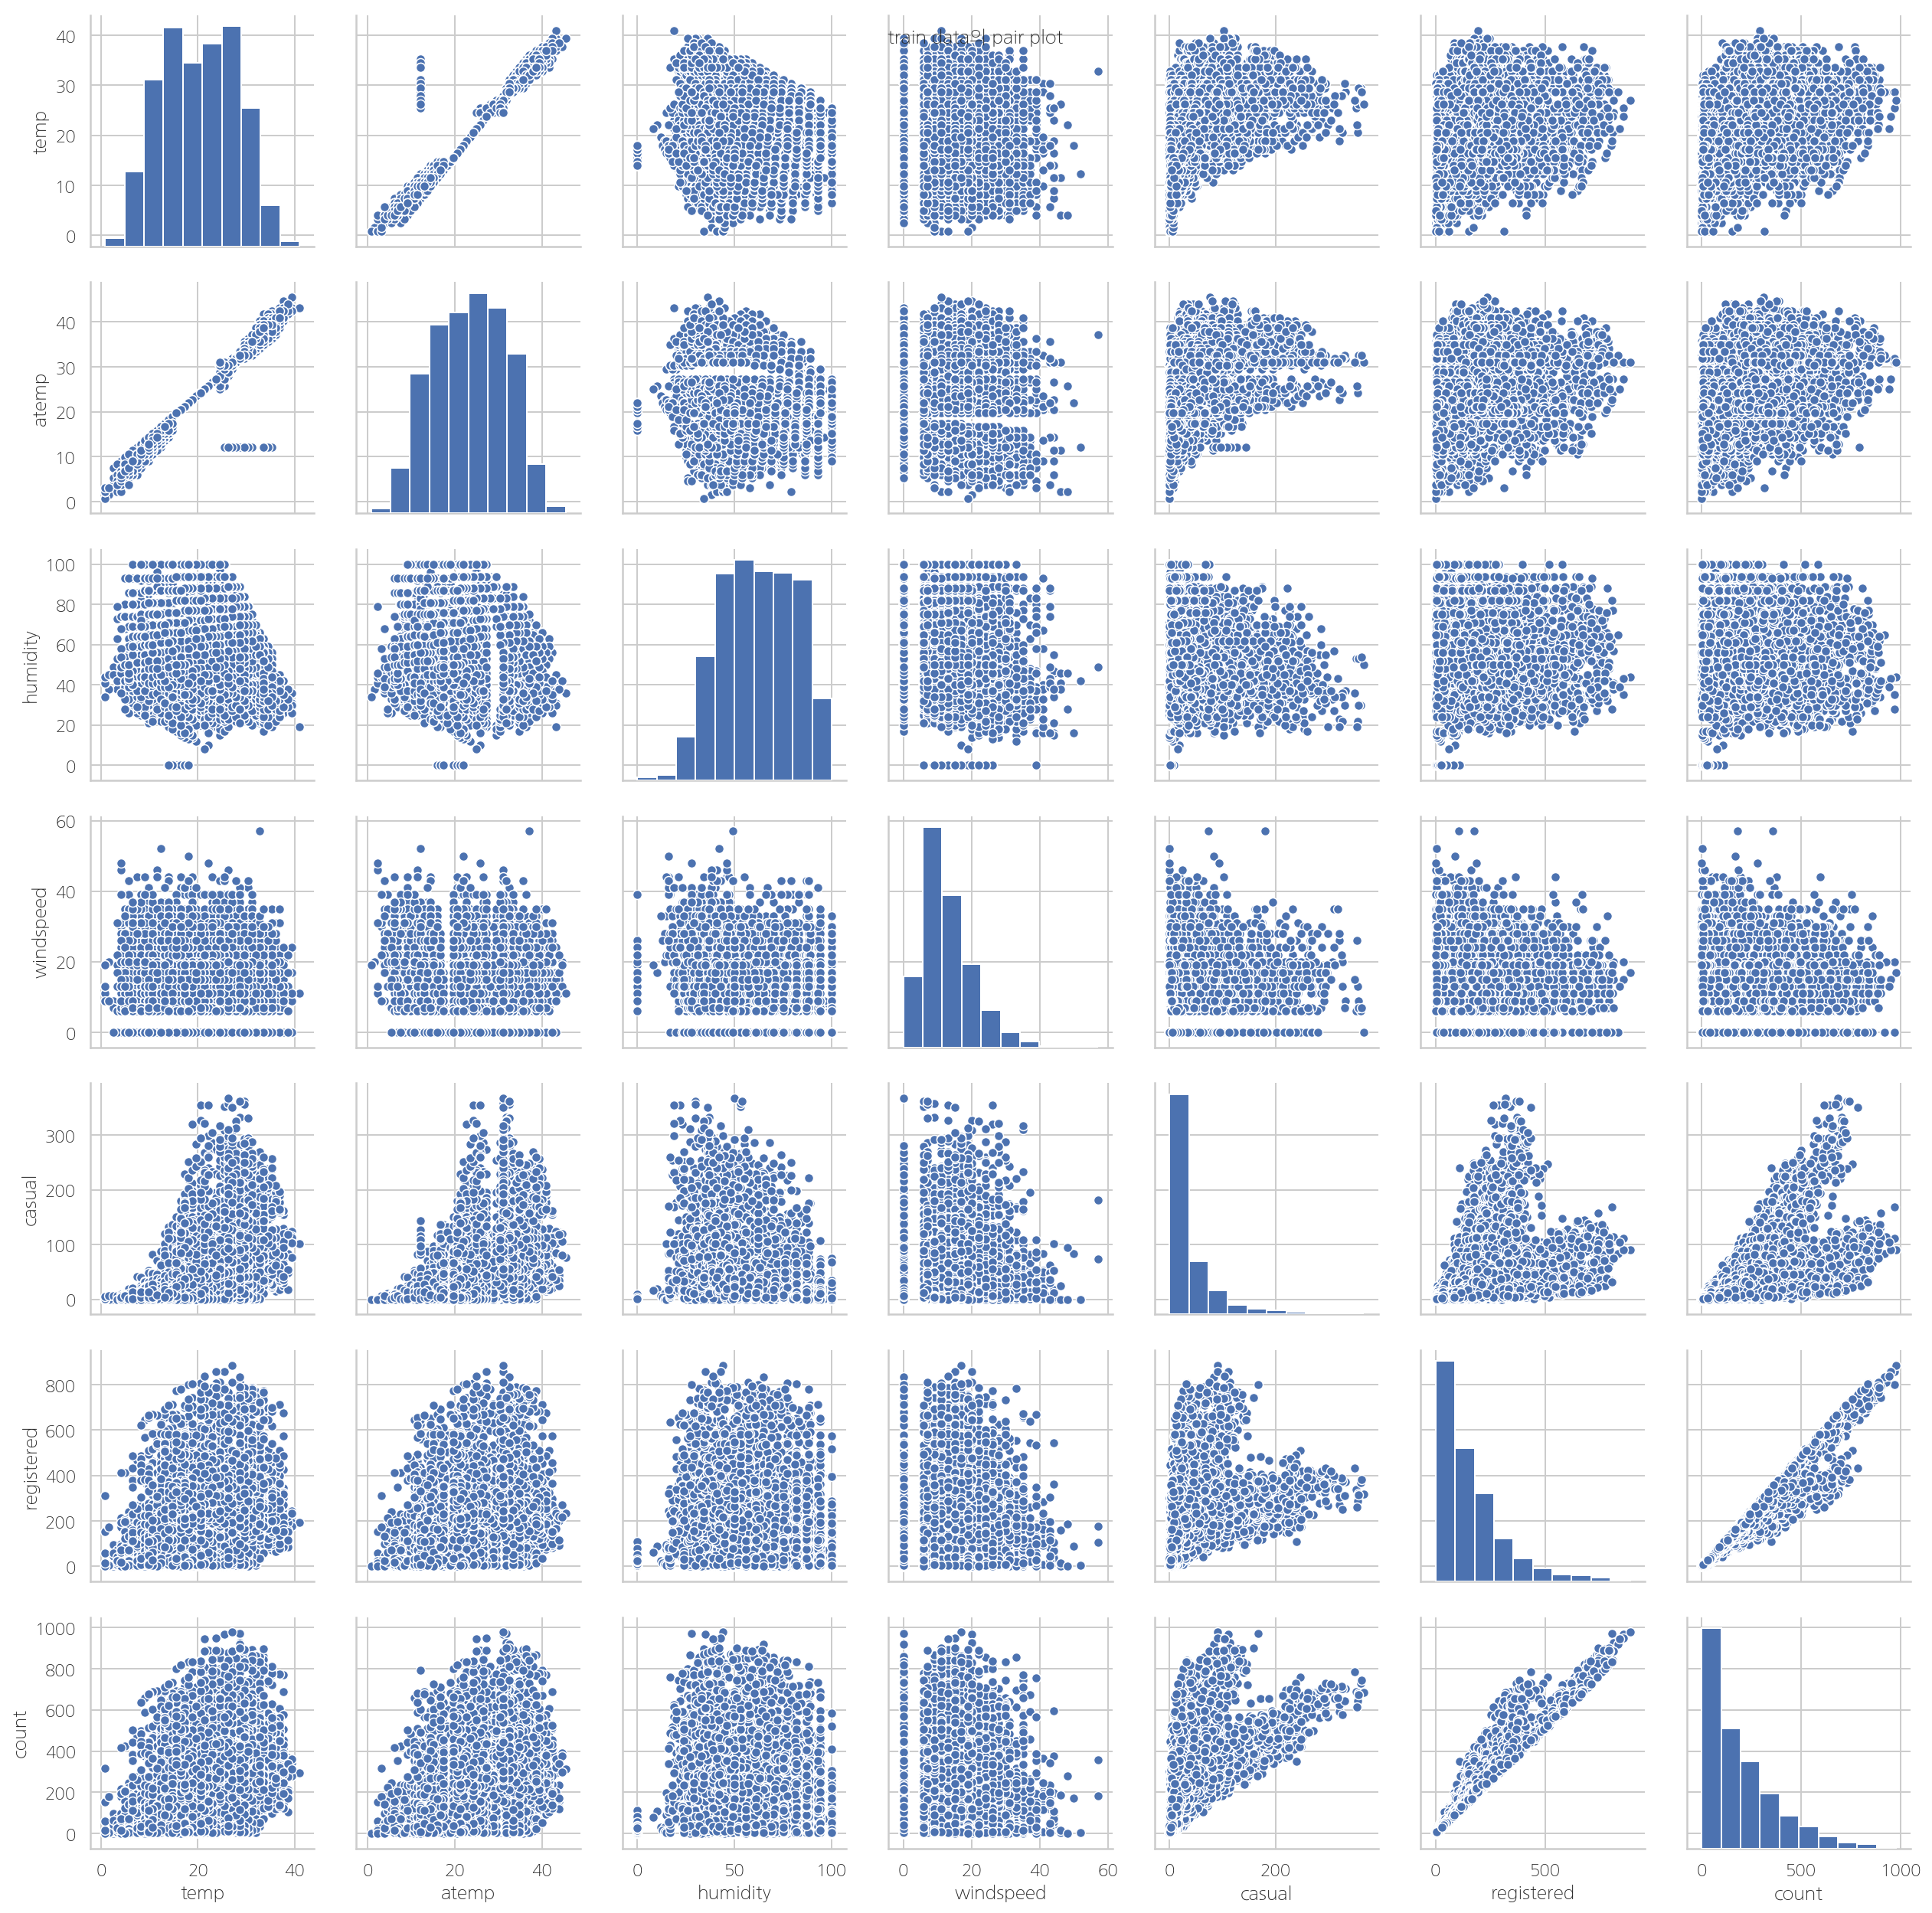

In [49]:
sns.pairplot(train[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]])
plt.suptitle('train data의 pair plot')

##  데이터를 바탕으로 한 EDA
### 1. 시간 관련 전처리가 필요하다. 하나의 칼럼에 시간이 모두 들어가있기 때문에 월이나 일로 쪼개주는 칼럼을 만들어야 한다.
    - 주말 여부와 시간에 따라 그래프를 그렸을때, 명확하게 구분이 가능하다.
    - 휴일 여부와 시간에 따라 그래프를 그렸을때는, 덜 명확하게 나타난다.
### 2. season은 전처리가 필요하다. 봄 여름 겨울 가을이 아니라 123월, 456월, 789월, 101112월이 묶여있기 때문이다.
### 3. 데이터에 0인 windspeed가 존재하고, 이는 실제로 풍속이 0이 아니라 missing value로 추정된다.
### 4. 데이터에 0인 humidity가 존재하고, 이는 실제로 습도가 0이 아니라 missing value로 추정된다.
### 5. count에 로그를 취해서 모델을 만들어야 한다.
### 6. atemp에 이상 데이터가 있다. 이를 전처리 해줘야 한다.
### 7. 풍속, 기온, 습도, 계절은 count와 밀접한 관련이 있다.

## 3-1. 시간관련 전처리

### datetime이라는 컬럼의 형태를 확인했을때, object임을 확인할 수 있다. 이를 datetime으로 파싱하여 받아주고, 월, 요일등으로 쪼개 의미있는 데이터가 있는지 알아보려고 한다.

In [50]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [51]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
test = pd.read_csv("test.csv", parse_dates=['datetime'])

In [52]:
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['weekend'] = train['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [53]:
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test['weekend'] = test['dayofweek'].apply(lambda x: 1 if x >= 5 else 0) # 0이 평일 1이 주말

In [54]:
train['month_day'] = train['datetime'].apply(lambda x: int(x.strftime('%m%d')))
test['month_day'] = test['datetime'].apply(lambda x: int(x.strftime('%m%d'))) 

In [55]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                  int64
day                    int64
hour                   int64
dayofweek              int64
weekend                int64
month_day              int64
dtype: object

### 주말과 평일, 시간별 count 분포를 살펴보았을 때, 명확하게 구분됨을 확인할 수 있었다. 이를 통해 교호작용이 있을것이란것을 예측할 수 있다.

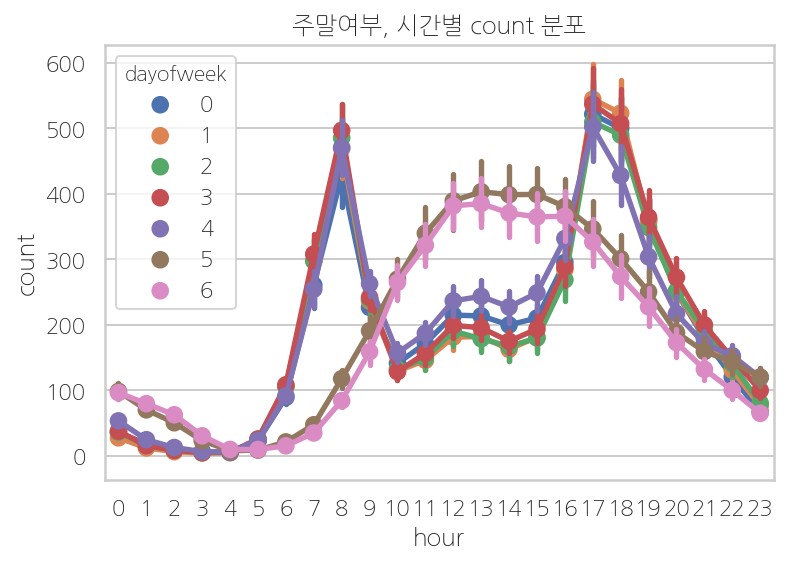

In [56]:
plt.title("주말여부, 시간별 count 분포")
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek')
# 0-4는 평일, 5, 6은 주말

### 휴일과 휴일이 아닌날의 시간별 count 분포를 살펴보았을때는 주말여부, 시간별 count 분포보다는 명확한 차이가 없었음을 확인할 수 있다.

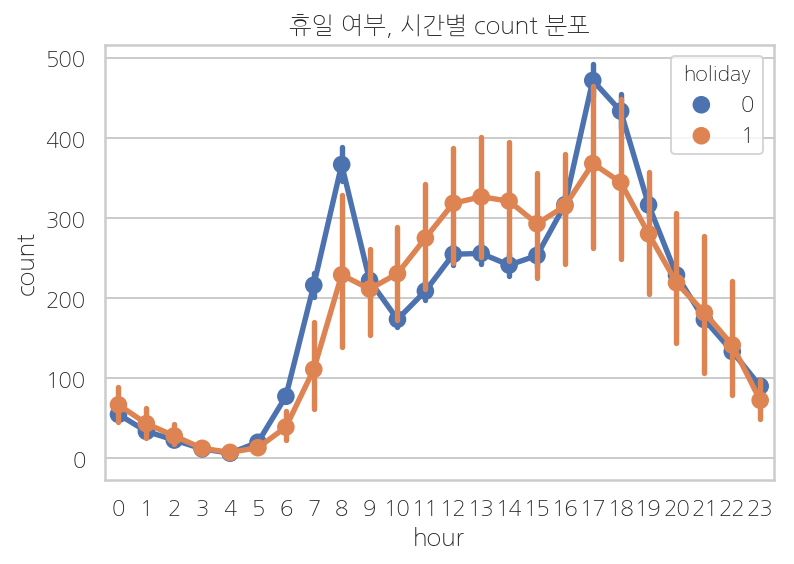

In [57]:
plt.title("휴일 여부, 시간별 count 분포")
sns.pointplot(data=train, x='hour',y='count',hue= 'holiday')
# 0은 휴일이 아닌날, 1은 휴일인날

## 3-2. season 전처리
### - kaggle의 description은 1이 spring, 2가 summer등으로 기술되었지만, 실제로 데이터를 확인해보면 1, 2, 3월은 1로 3, 4, 5월은 2로 묶였음을 확인할 수 있다. 이를 처리해주기 위해 datetime의 month를 분리하고, 월별로 계절을 나눠준다.
### - [워싱턴 D.C의 계절처리](https://ko.weatherspark.com/y/20957/%EB%AF%B8%EA%B5%AD-%EC%BB%AC%EB%9F%BC%EB%B9%84%EC%95%84-%ED%8A%B9%EB%B3%84%EA%B5%AC-%EC%9B%8C%EC%8B%B1%ED%84%B4-D.C.%EC%9D%98-%EB%85%84%EC%A4%91-%ED%8F%89%EA%B7%A0-%EB%82%A0%EC%94%A8)

In [14]:
def season_div(df):
    if df['month_day'] >= 1201 or df['month_day'] <= 304:
        df['season'] = 4 # 겨울
    elif df['month_day'] >= 305 and df['month_day'] <= 529:
        df['season'] = 1 # 봄
    elif df['month_day'] >= 530 and df['month_day'] <= 916:
        df['season'] = 2 # 여름
    else:
        df['season'] = 3 # 가을
    return df['season']
train['season'] = train[['month_day']].apply(season_div, axis = 1)
test['season'] = test[['month_day']].apply(season_div, axis = 1)

## 3-3. wind speed 전처리
### 전체 데이터의 약 12%에 해당하는 1300여개의 데이터들의 windspeed가 0임을 알 수 있다. 그리고 도메인 지식 활용을 통해 windspeed가 0은 가능하지 않음을 알 수 있었다. 즉, 일종의 missing value라고 할 수 있다.

In [15]:
len(train[train["windspeed"] == 0])

1313

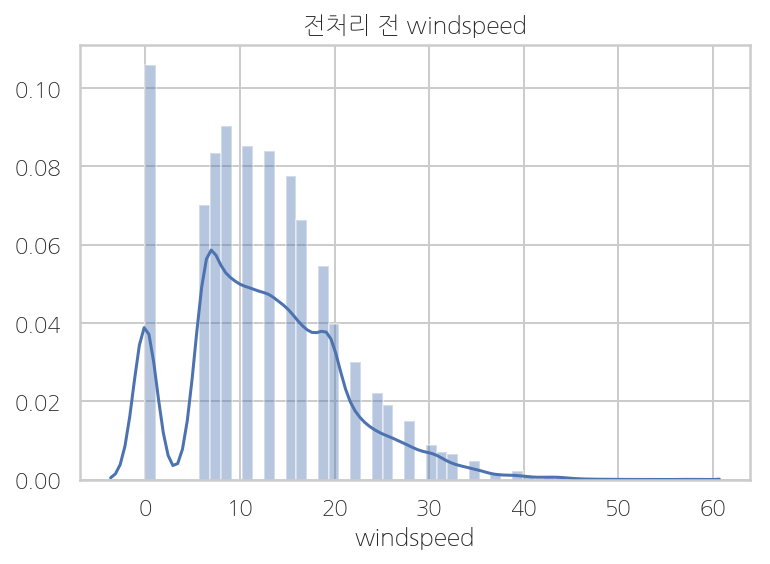

In [16]:
plt.title("전처리 전 windspeed")
sns.distplot(train["windspeed"])

### windspeed가 0인것은 Randomforest regressor로 채워준다,

In [17]:
dataWind0 = train[train["windspeed"]==0] 
dataWindNot0 = train[train["windspeed"]!=0] 
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"]) 

wind0Values = rfModel_wind.predict(X=dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
train = dataWindNot0.append(dataWind0)
train.reset_index(inplace=True)
train.drop('index',inplace=True,axis=1)

# test 데이터에도 똑같이 windspeed 데이터가 존재하기때문에 전처리를 해 주었다.
dataWind0 = test[test["windspeed"]==0] 
dataWindNot0 = test[test["windspeed"]!=0] 
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"]) 

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns]) 
dataWind0["windspeed"] = wind0Values
test = dataWindNot0.append(dataWind0)
test.reset_index(inplace=True)
test.drop('index',inplace=True,axis=1)

### 전처리가 완료된 windspeed의 분포는 다음과 같다.

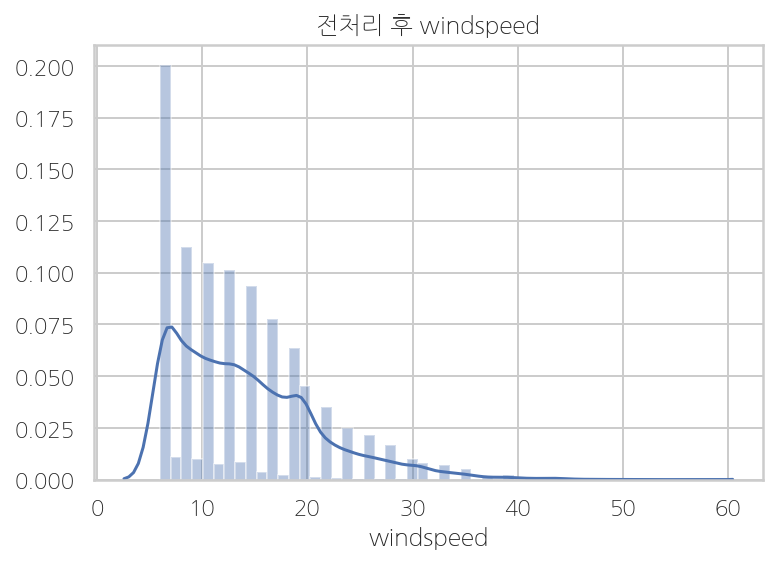

In [18]:
plt.title("전처리 후 windspeed")
sns.distplot(train["windspeed"])

## 3-4. humidity 전처리
### - humidity가 0인것은 검색을 통해 해당날짜의 평균 humidity로 채워주었다.(98.75) [humidity 전처리](https://www.timeanddate.com/weather/usa/washington-dc/historic?month=3&year=2011)

In [19]:
train['humidity'] = train['humidity'].apply(lambda x: 98.75 if x == 0 else x)

## 3-5. count 분포 확인

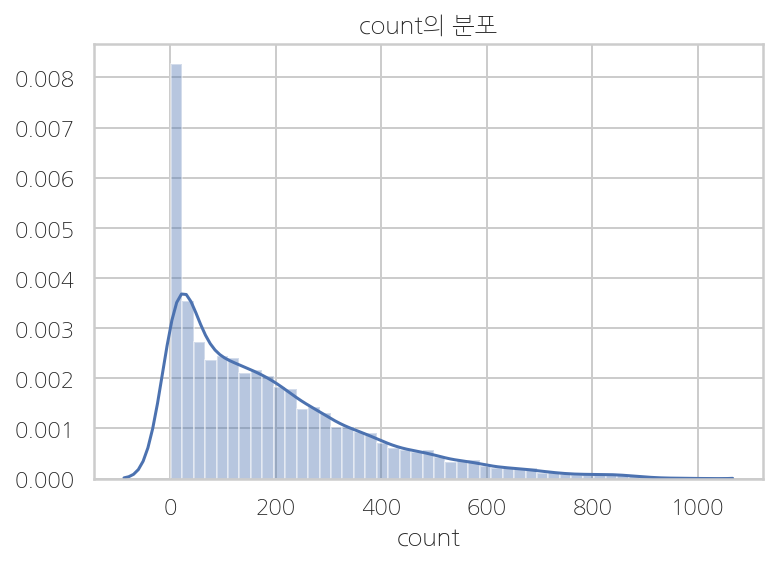

In [20]:
plt.title("count의 분포")
sns.distplot(train["count"])

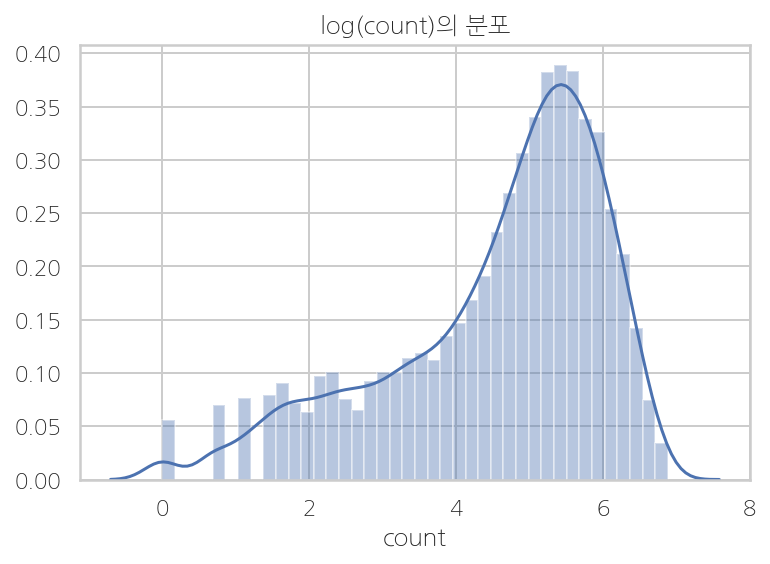

In [21]:
plt.title("log(count)의 분포")
sns.distplot(np.log(train["count"]))

### 로그변환을 시켜줬을때 선형성을 좀 더 띠고 있음을 알 수 있다. 또한 이 데이터의 목표값은 자전거 대여의 count로, 마이너스 값이 나올 수 없다.
### 즉 이 모델은 로그 변환을 시켜준 후 지수로 다시 돌려주는 형태로 회귀분석을 해야 함을 알 수 있다.

## 3-6. atemp 전처리
### - pairplot을 보면 알 수 있듯이, atemp에 12.12라는 숫자가 들어가는 컬럼이 있고, 도메인 지식으로 이는 잘못됐다는 것을 알 수있다. 이를 주어진 온도에서 체감온도 공식을 대입해 12.12라는 atemp를 대체한다 [체감온도 공식](http://joyfulhome.tistory.com/112)


In [22]:
def change_atemp(df):
    if df['atemp'] == 12.12:
        return 13.12 + 0.6215*float(df['temp']) - 11.37*(float(df["windspeed"])**0.16) + 0.3965*float(df["temp"])*(float(df["windspeed"])**0.16)
    else:
        return df['atemp']
train['adjusted_atemp'] = train.apply(lambda df: change_atemp(df), axis=1)

## 3-7. 습도, 온도, 풍속, 계절과 count의 관계

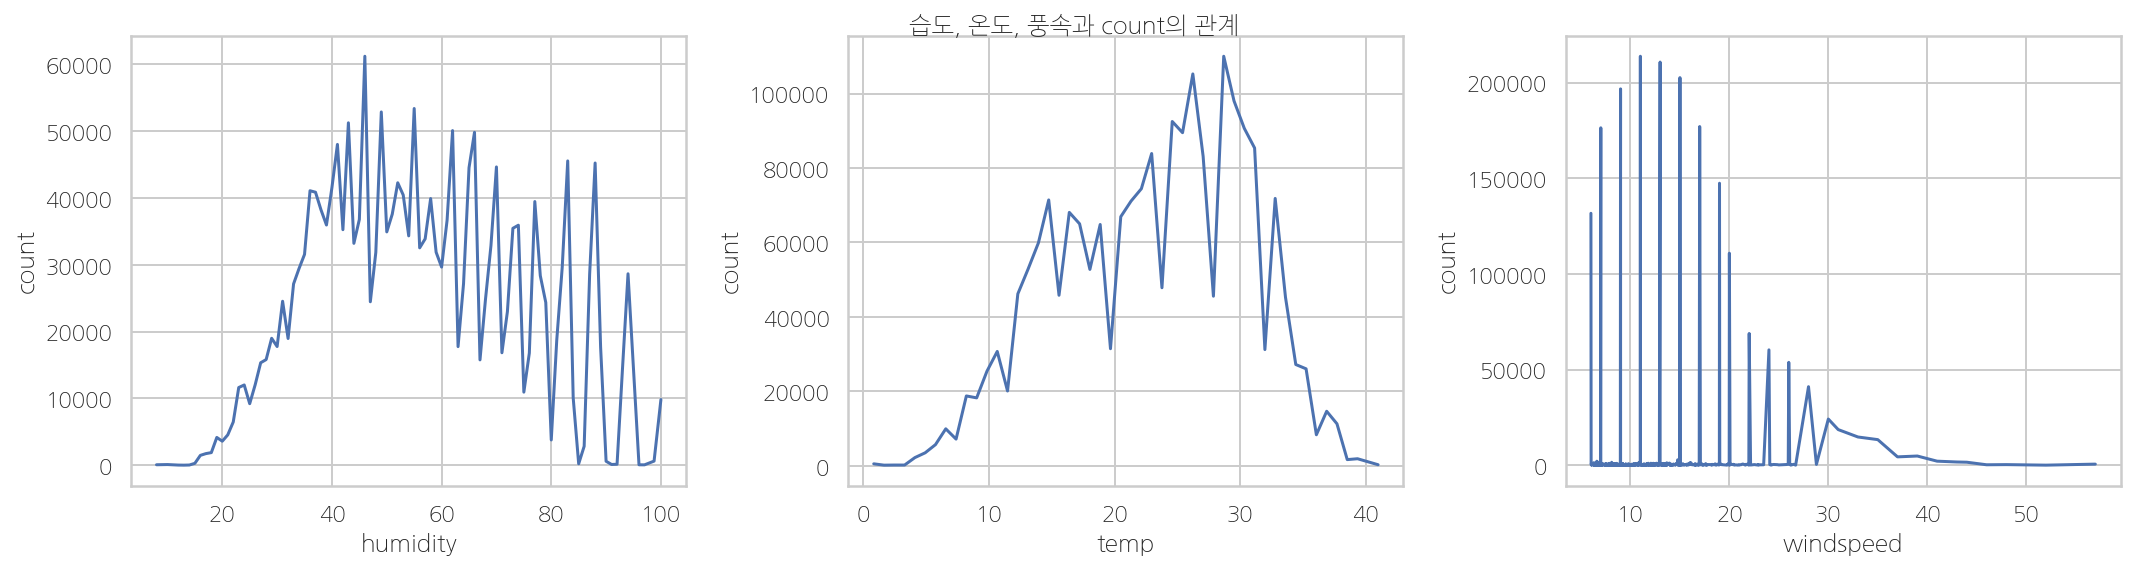

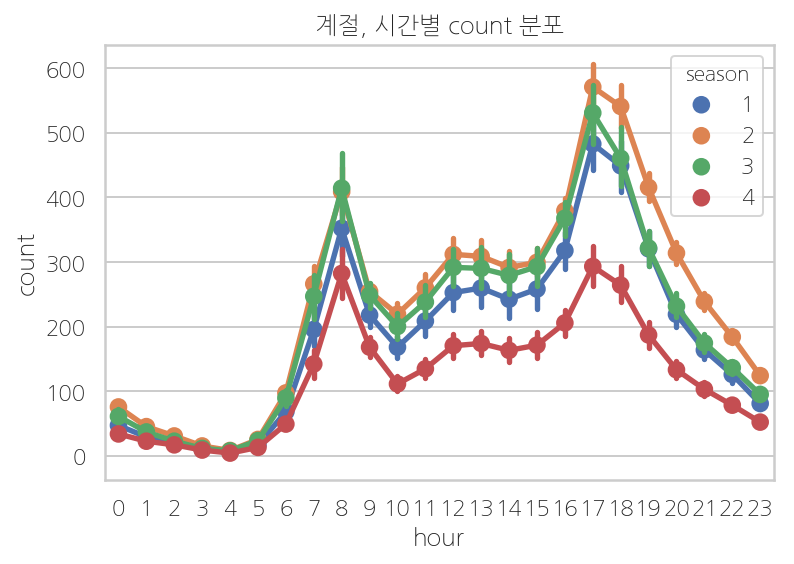

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.suptitle('습도, 온도, 풍속과 count의 관계')
sns.lineplot(x='humidity', y='count', estimator='sum', data=train, ci=None)
plt.subplot(132)
sns.lineplot(x='temp', y='count', estimator='sum', data=train, ci=None)
plt.subplot(133)
sns.lineplot(x='windspeed', y='count', estimator='sum', data=train, ci=None)
plt.tight_layout()
plt.show()
plt.title("계절, 시간별 count 분포")
sns.pointplot(data=train,x='hour',y='count',hue='season')
#1부터 봄, 여름, 가을, 겨울

### 습도와 온도, 풍속은 count와 밀접하게 연관이 있어 보인다. 습도와 체감기온은 일정 수준이 다다를때까진 count가 지속적으로 늘다가 그 이후에는 감소하는 패턴을 보이고, 풍속은 대체적으로 바람의 세기가 세질수록 count가 줄어드는 것을 확인할 수 있다.

### 눈으로 확인해보았을때, windspeed는 대체적으로 음의 상관관계, temp는 양의 상관관계가 있음을 확인할 수 있다. 정확한 결과값은 최종 OLS 모델에서 확인할 수 있다.

### 또한 계절별 count를 확인했을때도 겨울에 눈에띠게 count의 수가 전반적으로 줄어든것을 확인할 수 있다.

## 최종적으로 전처리가 완료된 데이터 프레임은 다음과 같다.

In [24]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,weekend,month_day,adjusted_atemp
10881,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87.0,10.948331,21,211,232,12,17,12,0,0,1217,20.455
10882,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88.0,9.358426,15,196,211,12,17,15,0,0,1217,21.210
10883,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94.0,7.804830,10,652,662,12,18,8,1,0,1218,19.695
10884,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49.0,12.998000,5,127,132,12,18,22,1,0,1218,16.665
10885,2012-12-19 00:00:00,4,0,1,1,12.30,15.910,61.0,6.342622,6,35,41,12,19,0,2,0,1219,15.910


# 4. OLS 모델링

### EDA를 통해 주말과 평일, 시간에 따른 분포가 달라짐을 확인할 수 있었다. 이를 통해 주말과 평일의 여부와, 시간의 교호작용이 있을 것이라는것을 추측할 수 있다. 주말, 평일과 시간의 교호작용만으로 초기 모델을 만들고, 모델의 성능을 측정해본다.

## <center>초기모델 : 주말과 평일, 시간의 교호작용</center>

In [25]:
f = 'np.log((count)+1) ~ 0 + C(hour) * C(weekend)' 
train_result = sm.OLS.from_formula(f, train).fit()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log((count) + 1)   R-squared:                       0.816
Model:                             OLS   Adj. R-squared:                  0.815
Method:                  Least Squares   F-statistic:                     1025.
Date:                 Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                         12:15:48   Log-Likelihood:                -10037.
No. Observations:                10886   AIC:                         2.017e+04
Df Residuals:                    10838   BIC:                         2.052e+04
Df Model:                           47                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(hour)[0]                        3.4468      0.034    101.597      0.000       3.380       3.513
C(hour)[1]                        2.6528      0.034     78.072      0.000       2.586       2.719
C(hour)[2]                        2.0763      0.034     60.727      0.000       2.009       2.143
C(hour)[3]                        1.6716      0.035     47.566      0.000       1.603       1.741
C(hour)[4]                        1.7234      0.035     49.768      0.000       1.656       1.791
C(hour)[5]                        3.0521      0.034     89.963      0.000       2.986       3.119
C(hour)[6]                        4.4653      0.034    131.620      0.000       4.399       4.532
C(hour)[7]                        5.4894      0.034    161.806      0.000       5.423       5.556
C(hour)[8]                        6.0442      0.034    178.159      0.000       5.978       6.111
C(hour)[9]                        5.4080      0.034    159.408      0.000       5.342       5.475
C(hour)[10]                       4.8169      0.034    141.985      0.000       4.750       4.883
C(hour)[11]                       4.9588      0.034    146.167      0.000       4.892       5.025
C(hour)[12]                       5.1894      0.034    153.200      0.000       5.123       5.256
C(hour)[13]                       5.1844      0.034    153.053      0.000       5.118       5.251
C(hour)[14]                       5.0931      0.034    150.356      0.000       5.027       5.159
C(hour)[15]                       5.1736      0.034    152.733      0.000       5.107       5.240
C(hour)[16]                       5.5500      0.034    163.847      0.000       5.484       5.616
C(hour)[17]                       6.1416      0.034    181.311      0.000       6.075       6.208
C(hour)[18]                       6.0648      0.034    179.044      0.000       5.998       6.131
C(hour)[19]                       5.7146      0.034    168.706      0.000       5.648       5.781
C(hour)[20]                       5.3698      0.034    158.526      0.000       5.303       5.436
C(hour)[21]                       5.0742      0.034    149.801      0.000       5.008       5.141
C(hour)[22]                       4.7836      0.034    141.220      0.000       4.717       4.850
C(hour)[23]                       4.3108      0.034    127.263      0.000       4.244       4.377
C(weekend)[T.1]                   1.0014      0.063     15.898      0.000       0.878       1.125
C(hour)[T.1]:C(weekend)[T.1]      0.5538      0.089      6.215      0.000       0.379       0.728
C(hour)[T.2]:C(weekend)[T.1]      0.8590      0.089      9.606      0.000       0.684       1.034
C(hour)[T.3]:C(weekend)[T.1]      0.5181      0.090      5.786      0.000       0.343       0.694
C(hour)[T.4]:C(weekend)[T.1]     -

## 5%의 유의확률에서 모든 변수가 유의미함을 확인할 수 있었고, 시간과 주말 여부의 교호작용만을 사용했는데 결정계수가 0.8 이상이 나옴을 확인할 수 있다. 즉, 자전거를 빌리는데 가장 많이 영향을 미치는 것은 빌리는 시간과 평일, 주말 여부이다.

In [26]:
from sklearn.model_selection import KFold
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
rmsle(train_result.predict(train), train["count"])


scores = np.zeros(5)
errors = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train)):
    df_train1 = train.iloc[idx_train]
    df_test1 = train.iloc[idx_test]

    
    
    model = sm.OLS.from_formula('np.log((count)+1) ~ 0 + C(hour) * C(weekend)', data=df_train1)
    result = model.fit()
    
    pred = np.exp(result.predict(df_test1)) # 근데 마이너스가 들어가는 데이터는 처리 못해줬음. 이것만 해주면 성능 훨씬 좋아질 것
    pred1 = np.exp(result.predict(df_train1))
    rss = ((df_test1['count'] - pred) ** 2).sum()
    tss = ((df_test1['count'] - df_test1["count"].mean())** 2).sum()
    rsquared = 1 - (rss / tss)


    
    scores[i] = rsquared
    errors[i] = rmsle(pred1, df_train1["count"])
    
    print("K-Fold : {}번째".format(i+1))
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared)) # 소수점 8자리까지 나와라는 코드인듯
    print("rmsle = {:.8f}".format(rmsle(pred1, df_train1["count"])))
    print()
    ## 다만 test데이터와 train데이터의 결정계수가 차이가 조금나는것을 확인할 수 있다. 아직은 모델이 설명이 덜 됐다는 것을 의미한다. 좀더 추가해보기 

K-Fold : 1번째
train R2 = 0.81516131, test R2 = 0.60955485
rmsle = 0.60970575

K-Fold : 2번째
train R2 = 0.81729301, test R2 = 0.61277983
rmsle = 0.61075003

K-Fold : 3번째
train R2 = 0.81843023, test R2 = 0.62054686
rmsle = 0.61093521

K-Fold : 4번째
train R2 = 0.81887094, test R2 = 0.59735190
rmsle = 0.60742028

K-Fold : 5번째
train R2 = 0.81296691, test R2 = 0.64701977
rmsle = 0.61170201



## 다만, K-Fold를 통해 train 데이터와 test 데이터의 결정계수가 0.2정도 차이남을 알 수 있다. 모델의 설명력을 높여주는 변수들을 추가해본다. 위의 EDA에서 습도, 풍속, 계절 등이 count와 관계가 있었음을 확인할 수 있었다.

## <center>수정모델 : 초기모델 + 습도, 계절 영향 추가</center>

In [27]:
f = 'np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity) + C(season)'
train_result = sm.OLS.from_formula(f, train).fit()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log((count) + 2)   R-squared:                       0.868
Model:                             OLS   Adj. R-squared:                  0.867
Method:                  Least Squares   F-statistic:                     1391.
Date:                 Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                         12:15:49   Log-Likelihood:                -7858.0
No. Observations:                10886   AIC:                         1.582e+04
Df Residuals:                    10834   BIC:                         1.620e+04
Df Model:                           51                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(hour)[0]                        3.4804      0.029    119.385      0.000       3.423       3.538
C(hour)[1]                        2.7405      0.029     93.791      0.000       2.683       2.798
C(hour)[2]                        2.2240      0.029     75.600      0.000       2.166       2.282
C(hour)[3]                        1.8592      0.030     61.600      0.000       1.800       1.918
C(hour)[4]                        1.9204      0.030     64.328      0.000       1.862       1.979
C(hour)[5]                        3.1348      0.029    107.070      0.000       3.077       3.192
C(hour)[6]                        4.5036      0.029    153.802      0.000       4.446       4.561
C(hour)[7]                        5.5085      0.029    188.451      0.000       5.451       5.566
C(hour)[8]                        6.0446      0.029    207.253      0.000       5.987       6.102
C(hour)[9]                        5.3868      0.029    185.057      0.000       5.330       5.444
C(hour)[10]                       4.7741      0.029    164.056      0.000       4.717       4.831
C(hour)[11]                       4.8890      0.029    167.724      0.000       4.832       4.946
C(hour)[12]                       5.0992      0.029    174.708      0.000       5.042       5.156
C(hour)[13]                       5.0765      0.029    173.381      0.000       5.019       5.134
C(hour)[14]                       4.9766      0.029    169.626      0.000       4.919       5.034
C(hour)[15]                       5.0544      0.029    172.190      0.000       4.997       5.112
C(hour)[16]                       5.4307      0.029    185.096      0.000       5.373       5.488
C(hour)[17]                       6.0318      0.029    206.103      0.000       5.974       6.089
C(hour)[18]                       5.9683      0.029    204.417      0.000       5.911       6.025
C(hour)[19]                       5.6402      0.029    193.720      0.000       5.583       5.697
C(hour)[20]                       5.3139      0.029    182.761      0.000       5.257       5.371
C(hour)[21]                       5.0397      0.029    173.433      0.000       4.983       5.097
C(hour)[22]                       4.7650      0.029    163.939      0.000       4.708       4.822
C(hour)[23]                       4.3113      0.029    148.231      0.000       4.254       4.368
C(weekend)[T.1]                   0.9674      0.052     18.758      0.000       0.866       1.069
C(season)[T.2]                    0.3530      0.013     27.090      0.000       0.327       0.379
C(season)[T.3]                    0.2264      0.015     15.045      0.000       0.197       0.256
C(season)[T.4]                   -0.4107      0.014    -30.188      0.000      -0.437      -0.384
C(hour)[T.1]:C(weekend)[T.1]      

In [28]:
from sklearn.model_selection import KFold
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
rmsle(train_result.predict(train), train["count"])


scores = np.zeros(5)
errors = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train)):
    df_train1 = train.iloc[idx_train]
    df_test1 = train.iloc[idx_test]

    
    
    model = sm.OLS.from_formula('np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity) + C(season)', data=df_train1)
    result = model.fit()
    
    pred = np.exp(result.predict(df_test1))
    pred1 = np.exp(result.predict(df_train1))
    rss = ((df_test1['count'] - pred) ** 2).sum()
    tss = ((df_test1['count'] - df_test1["count"].mean())** 2).sum()
    rsquared = 1 - (rss / tss)


    
    scores[i] = rsquared
    errors[i] = rmsle(pred1, df_train1["count"])
    
    print("K-Fold : {}번째".format(i+1))
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared)) 
    print("rmsle = {:.8f}".format(rmsle(pred1, df_train1["count"])))
    print()

K-Fold : 1번째
train R2 = 0.86694758, test R2 = 0.73082052
rmsle = 0.52661280

K-Fold : 2번째
train R2 = 0.86837612, test R2 = 0.74141878
rmsle = 0.52825420

K-Fold : 3번째
train R2 = 0.86974530, test R2 = 0.73141959
rmsle = 0.52785498

K-Fold : 4번째
train R2 = 0.86919691, test R2 = 0.72234913
rmsle = 0.52588009

K-Fold : 5번째
train R2 = 0.86419149, test R2 = 0.75496265
rmsle = 0.52976503



### 아까보다 train과 test의 오차범위가 줄었다. 평균 0.13정도 차이남을 확인할 수 있다. 또한 test의 결정계수가 0.7 이상임을 확인할 수 있다.

## <center>최종모델 : 시간과 주말 여부의 교호작용, 습도, 계절, 날씨, 풍속, 온도 </center>

In [29]:
f = 'np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity) + C(season) + C(weather) + scale(windspeed) + scale(temp)' # 시간과 주말인지 아닌지의 여부가 이 모델의 거의 모든 것을 결정한다.
train_result = sm.OLS.from_formula(f, train).fit()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log((count) + 2)   R-squared:                       0.896
Model:                             OLS   Adj. R-squared:                  0.896
Method:                  Least Squares   F-statistic:                     1673.
Date:                 Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                         12:15:51   Log-Likelihood:                -6521.2
No. Observations:                10886   AIC:                         1.316e+04
Df Residuals:                    10829   BIC:                         1.357e+04
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(hour)[0]                        3.6016      0.026    138.294      0.000       3.551       3.653
C(hour)[1]                        2.8828      0.026    110.409      0.000       2.832       2.934
C(hour)[2]                        2.3678      0.026     90.097      0.000       2.316       2.419
C(hour)[3]                        2.0083      0.027     74.488      0.000       1.955       2.061
C(hour)[4]                        2.0862      0.027     78.086      0.000       2.034       2.139
C(hour)[5]                        3.3094      0.026    125.897      0.000       3.258       3.361
C(hour)[6]                        4.6970      0.026    178.621      0.000       4.645       4.749
C(hour)[7]                        5.6944      0.026    216.719      0.000       5.643       5.746
C(hour)[8]                        6.2079      0.026    236.816      0.000       6.156       6.259
C(hour)[9]                        5.5255      0.026    210.766      0.000       5.474       5.577
C(hour)[10]                       4.8900      0.026    186.428      0.000       4.839       4.941
C(hour)[11]                       4.9666      0.026    188.421      0.000       4.915       5.018
C(hour)[12]                       5.1617      0.027    194.727      0.000       5.110       5.214
C(hour)[13]                       5.1108      0.027    191.492      0.000       5.058       5.163
C(hour)[14]                       4.9970      0.027    186.735      0.000       4.945       5.049
C(hour)[15]                       5.0751      0.027    189.672      0.000       5.023       5.128
C(hour)[16]                       5.4563      0.027    204.892      0.000       5.404       5.508
C(hour)[17]                       6.0765      0.026    229.308      0.000       6.025       6.128
C(hour)[18]                       6.0337      0.026    228.403      0.000       5.982       6.085
C(hour)[19]                       5.7099      0.026    218.593      0.000       5.659       5.761
C(hour)[20]                       5.3953      0.026    207.521      0.000       5.344       5.446
C(hour)[21]                       5.1274      0.026    197.488      0.000       5.076       5.178
C(hour)[22]                       4.8664      0.026    187.649      0.000       4.816       4.917
C(hour)[23]                       4.4311      0.026    170.580      0.000       4.380       4.482
C(weekend)[T.1]                   0.9682      0.046     21.216      0.000       0.879       1.058
C(season)[T.2]                   -0.0980      0.015     -6.430      0.000      -0.128      -0.068
C(season)[T.3]                    0.2517      0.013     18.769      0.000       0.225       0.278
C(season)[T.4]                   -0.0821      0.015     -5.635      0.000      -0.111      -0.054
C(weather)[T.2]                  -

### 그러나 데이터의 특성때문에 이분산성이 발생하고, 잔차 정규성 역시 만족시키지 못한다. 이에 대해서는 아래 결론 및 한계점에서 더 설명한다.

Text(0, 0.5, 'residuals')

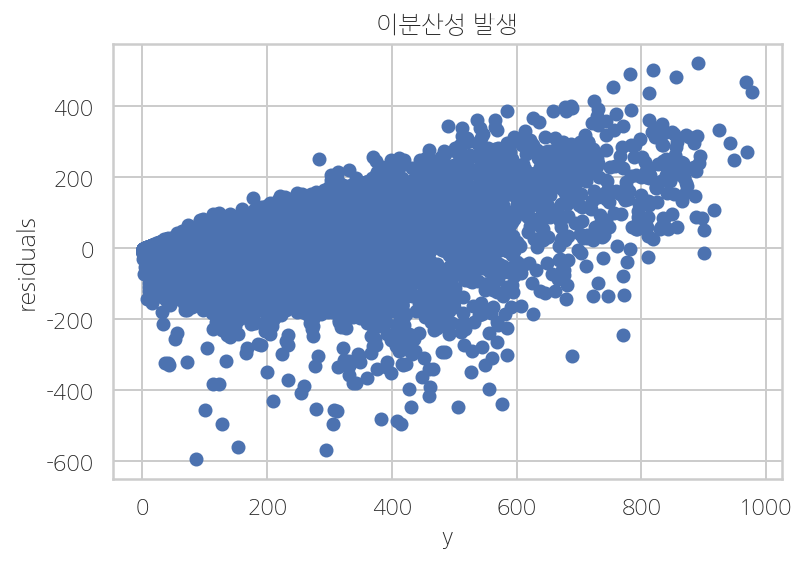

In [30]:
plt.title("이분산성 발생")
plt.scatter(train["count"], train["count"] - np.exp(train_result.predict(train))-1)
plt.xlabel('y')
plt.ylabel('residuals')

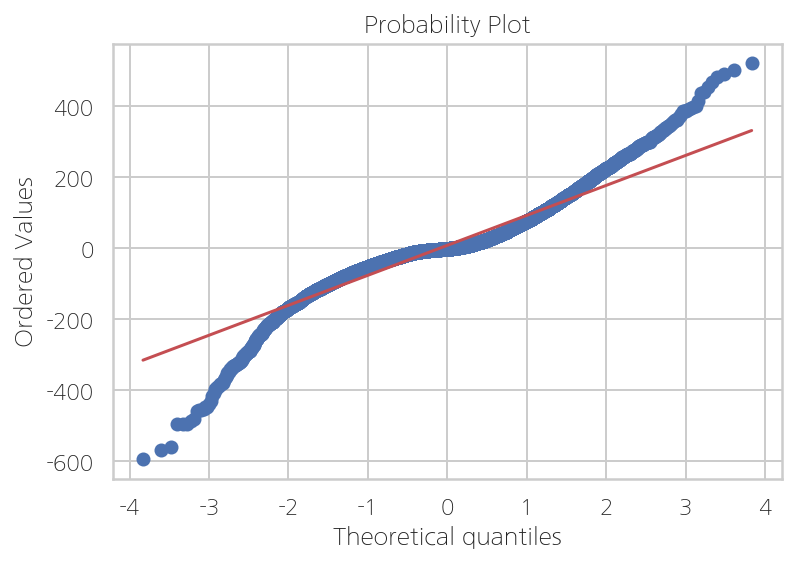

Chi^2       : 1135.009
P-value     :  0.000


In [31]:
sp.stats.probplot(train["count"] - np.exp(train_result.predict(train))-1, plot=plt)
plt.show()
test = sm.stats.omni_normtest(train["count"] - np.exp(train_result.predict(train))-1)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

### 예측한 값과 실제 타겟값의 scatter plot은 다음과 같다.

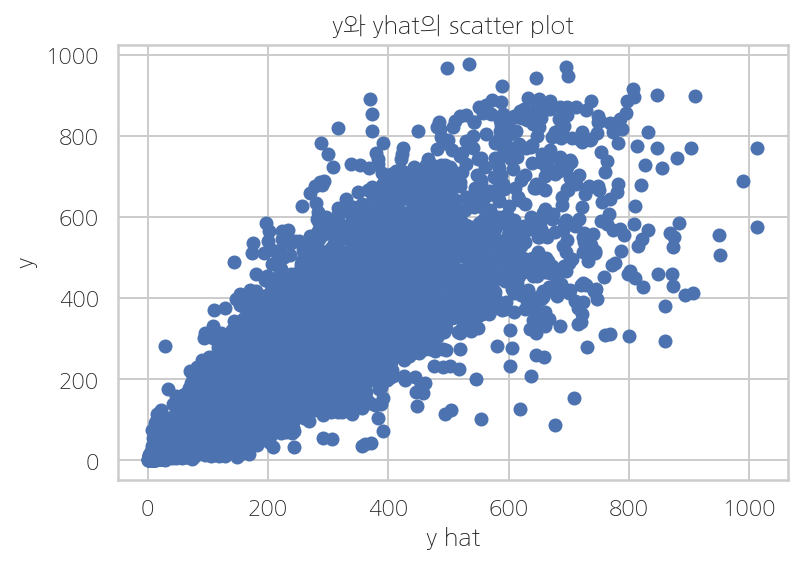

In [32]:
plt.title("y와 yhat의 scatter plot")
plt.scatter(x=np.exp((train_result.predict(train)))-1, y = train["count"])
plt.xlabel('y hat')
plt.ylabel('y')
plt.show()

## 최종모델은 K-Fold를 통한 rmsle가 만든 모델중에 최저이다.

In [33]:
from sklearn.model_selection import KFold
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
rmsle(train_result.predict(train), train["count"])


scores = np.zeros(5)
errors = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train)):
    df_train1 = train.iloc[idx_train]
    df_test1 = train.iloc[idx_test]

    
    try:
        model = sm.OLS.from_formula('np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity)*C(season) + C(weather) + scale(atemp)', data=df_train1)
        result = model.fit()
    
    
        pred = np.exp(result.predict(df_test1))
        pred1 = np.exp(result.predict(df_train1))
        rss = ((df_test1['count'] - pred) ** 2).sum()
        tss = ((df_test1['count'] - df_test1["count"].mean())** 2).sum()
        rsquared = 1 - (rss / tss)
    



        scores[i] = rsquared
        errors[i] = rmsle(pred1, df_train1["count"])
    except:
        continue
    
    print("K-Fold : {}번째".format(i+1))
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared))
    print("rmsle = {:.8f}".format(rmsle(pred1, df_train1["count"])))
    print()

K-Fold : 1번째
train R2 = 0.89766205, test R2 = 0.74834639
rmsle = 0.46681139

K-Fold : 2번째
train R2 = 0.89789936, test R2 = 0.77386411
rmsle = 0.47025638

K-Fold : 4번째
train R2 = 0.89831431, test R2 = 0.76719569
rmsle = 0.46858184

K-Fold : 5번째
train R2 = 0.89585304, test R2 = 0.78267505
rmsle = 0.46863563



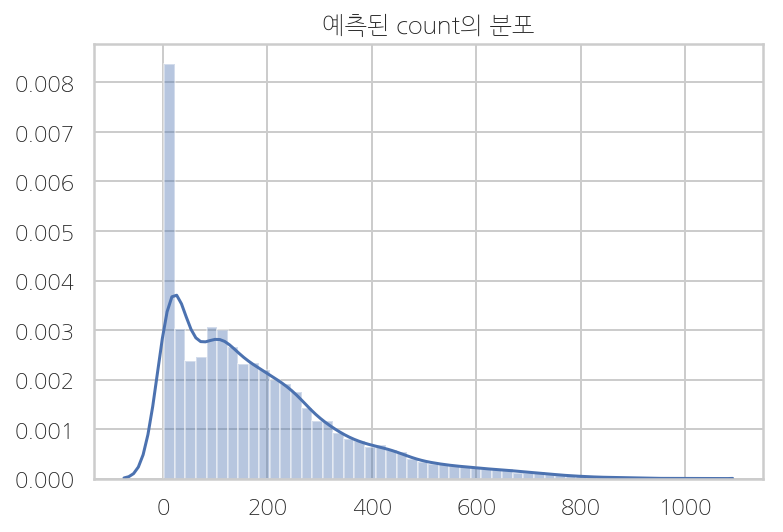

In [34]:
plt.title("예측된 count의 분포")
sns.distplot(np.exp(train_result.predict(train)))

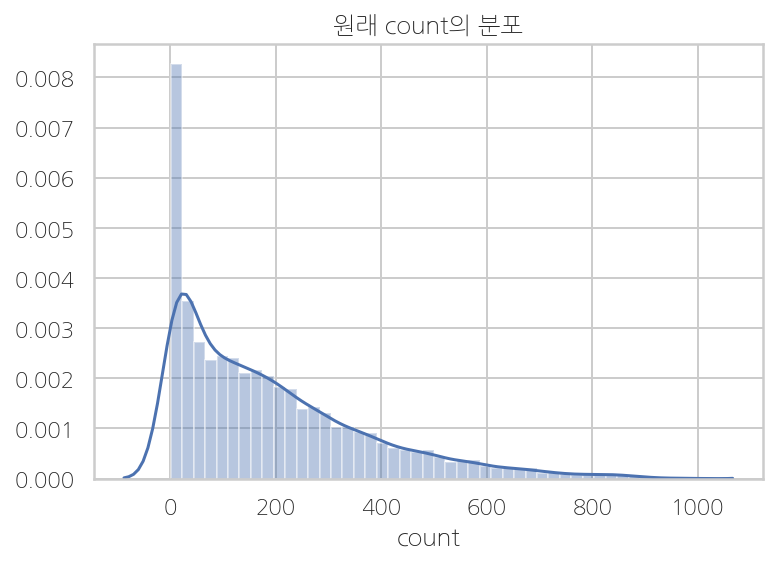

In [35]:
plt.title("원래 count의 분포")
sns.distplot(train["count"])

### 예측된 count의 분포와 원래 count의 분포가 비슷한 양상을 띠고 있음을 확인할 수 있다.

# 5. 결론 및 한계

In [36]:
f = 'np.log((count)+2) ~ 0 + C(hour) * C(weekend) + scale(humidity) + C(season) + C(weather) + scale(windspeed) + scale(temp)' # 시간과 주말인지 아닌지의 여부가 이 모델의 거의 모든 것을 결정한다.
train_result = sm.OLS.from_formula(f, train).fit()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log((count) + 2)   R-squared:                       0.896
Model:                             OLS   Adj. R-squared:                  0.896
Method:                  Least Squares   F-statistic:                     1673.
Date:                 Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                         12:15:55   Log-Likelihood:                -6521.2
No. Observations:                10886   AIC:                         1.316e+04
Df Residuals:                    10829   BIC:                         1.357e+04
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(hour)[0]                        3.6016      0.026    138.294      0.000       3.551       3.653
C(hour)[1]                        2.8828      0.026    110.409      0.000       2.832       2.934
C(hour)[2]                        2.3678      0.026     90.097      0.000       2.316       2.419
C(hour)[3]                        2.0083      0.027     74.488      0.000       1.955       2.061
C(hour)[4]                        2.0862      0.027     78.086      0.000       2.034       2.139
C(hour)[5]                        3.3094      0.026    125.897      0.000       3.258       3.361
C(hour)[6]                        4.6970      0.026    178.621      0.000       4.645       4.749
C(hour)[7]                        5.6944      0.026    216.719      0.000       5.643       5.746
C(hour)[8]                        6.2079      0.026    236.816      0.000       6.156       6.259
C(hour)[9]                        5.5255      0.026    210.766      0.000       5.474       5.577
C(hour)[10]                       4.8900      0.026    186.428      0.000       4.839       4.941
C(hour)[11]                       4.9666      0.026    188.421      0.000       4.915       5.018
C(hour)[12]                       5.1617      0.027    194.727      0.000       5.110       5.214
C(hour)[13]                       5.1108      0.027    191.492      0.000       5.058       5.163
C(hour)[14]                       4.9970      0.027    186.735      0.000       4.945       5.049
C(hour)[15]                       5.0751      0.027    189.672      0.000       5.023       5.128
C(hour)[16]                       5.4563      0.027    204.892      0.000       5.404       5.508
C(hour)[17]                       6.0765      0.026    229.308      0.000       6.025       6.128
C(hour)[18]                       6.0337      0.026    228.403      0.000       5.982       6.085
C(hour)[19]                       5.7099      0.026    218.593      0.000       5.659       5.761
C(hour)[20]                       5.3953      0.026    207.521      0.000       5.344       5.446
C(hour)[21]                       5.1274      0.026    197.488      0.000       5.076       5.178
C(hour)[22]                       4.8664      0.026    187.649      0.000       4.816       4.917
C(hour)[23]                       4.4311      0.026    170.580      0.000       4.380       4.482
C(weekend)[T.1]                   0.9682      0.046     21.216      0.000       0.879       1.058
C(season)[T.2]                   -0.0980      0.015     -6.430      0.000      -0.128      -0.068
C(season)[T.3]                    0.2517      0.013     18.769      0.000       0.225       0.278
C(season)[T.4]                   -0.0821      0.015     -5.635      0.000      -0.111      -0.054
C(weather)[T.2]                  -

## 최종 모델의 p-value는 표본이 하나뿐인 weather4를 제외하고는 모두 0으로 나타났다.

## - 시간과 관련된 계수 확인

In [37]:
train_result.params[train_result.params>2]

C(hour)[0]     3.601615
C(hour)[1]     2.882799
C(hour)[2]     2.367846
C(hour)[3]     2.008269
C(hour)[4]     2.086219
C(hour)[5]     3.309437
C(hour)[6]     4.696995
C(hour)[7]     5.694369
C(hour)[8]     6.207854
C(hour)[9]     5.525490
C(hour)[10]    4.889966
C(hour)[11]    4.966620
C(hour)[12]    5.161745
C(hour)[13]    5.110801
C(hour)[14]    4.997036
C(hour)[15]    5.075141
C(hour)[16]    5.456300
C(hour)[17]    6.076483
C(hour)[18]    6.033656
C(hour)[19]    5.709928
C(hour)[20]    5.395342
C(hour)[21]    5.127355
C(hour)[22]    4.866394
C(hour)[23]    4.431148
dtype: float64

## 시간과 관련된 가중치들을 보았을 때, 오전 8시나 오후 5시, 6시경에 자전거 대여 대수가 늘어난다는 것을 확인할 수 있다. 또한 사람이 많이 다니지 않는 0시부터 5시까지는 출근시간을 제외한 오후시간대보다도 자전거 대여를 적게 한다는 것을 확인할 수 있다.

## EDA로 추측했던 것처럼 풍속은 count와 음의 상관관계, 기온은 count와 양의 상관관계가 있음을 확인할 수 있다. 또한 봄에비해 여름과 겨울에 count가 줄어든다는 것도 확인할 수 있다.

## 그러나 이 데이터는 OLS를 돌리기에 한계가 있는 데이터라고 볼 수 있다.

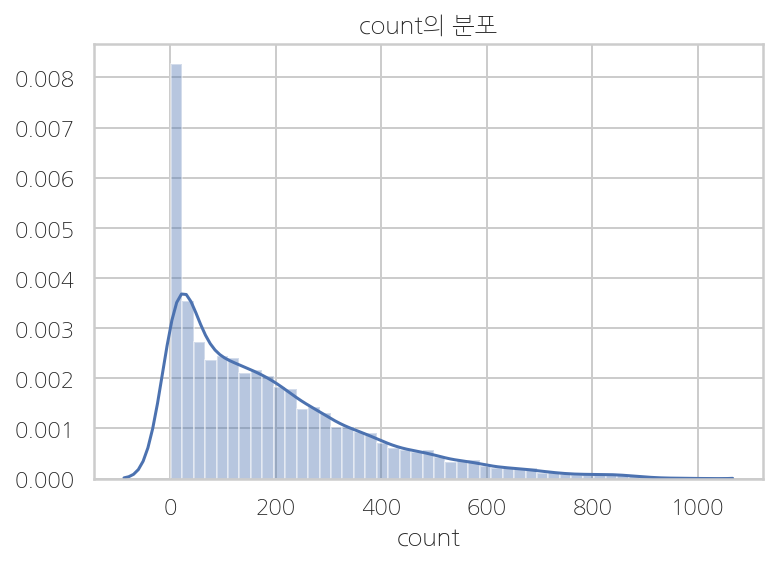

In [38]:
plt.title("count의 분포")
sns.distplot(train["count"])

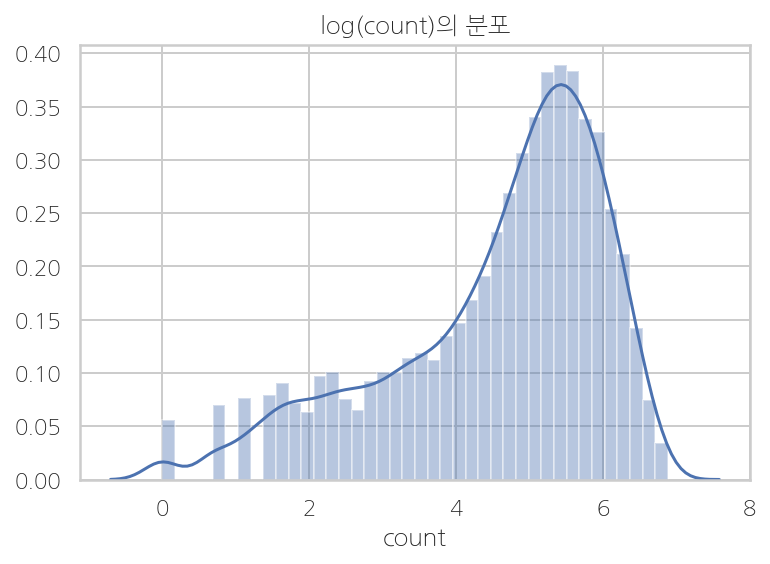

In [39]:
plt.title("log(count)의 분포")
sns.distplot(np.log(train["count"]))

In [40]:
print("count가 10 미만인 데이터 개수:{}".format(len(train[train["count"]<10])))
print("최대 count의 수 :{}".format(np.max(train["count"])))

count가 10 미만인 데이터 개수:1134
최대 count의 수 :977


## 전체의 약 10%에 해당하는 데이터가 count 10 미만이고, count의 최대치는 1000에 가깝다. 즉, count의 분포가 아래로 미끄러져 내려오는 모양을 띠고있다. 이를 log를 취해주면 그 전보다는 linear한 관계가 되지만, 한계가 있다. 즉, 아까 확인했던 것처럼 이분산성 문제가 발생한다.

## 또한 이 데이터는  registered(회원)와 casual(비회원)으로 나누어져 있고, 그 총합이 target data인 count에 해당한다. 이는 registered와 casual, count를 따로 회귀분석하고 제약조건을 걸어주는 방식으로 풀어볼 수 있지만, 결과값이 좋아진다는 보장이 없다.

## <center>감사합니다</center>